In [1]:
import pandas as pd
import numpy as np

In [35]:
dataset=pd.read_csv('dataset.csv')

In [36]:
print(dataset.head())
print(dataset.info())
print(dataset.shape)

   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB
None
(303, 2)


In [37]:
X=dataset['INCOME']
Y=dataset['SPEND']

In [38]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(pd.DataFrame(X))
Y=StandardScaler().fit_transform(pd.DataFrame(Y))

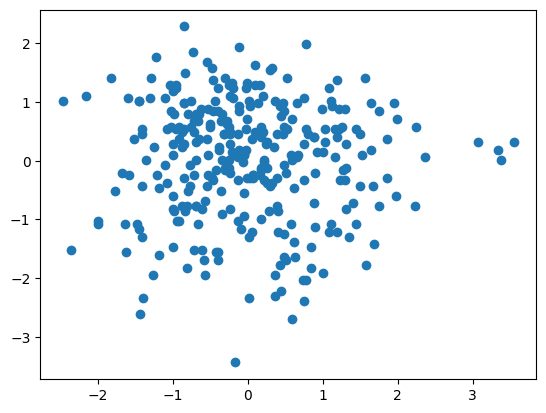

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

In [41]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
hyperparams={'n_clusters':range(1,5)}
gcv=GridSearchCV(KMeans(),hyperparams,cv=10)
gcv.fit(dataset)

GridSearchCV(cv=10, estimator=KMeans(), param_grid={'n_clusters': range(1, 5)})

In [42]:
gcv.best_score_

-25300.077302372338

In [43]:
gcv.best_params_

{'n_clusters': 4}

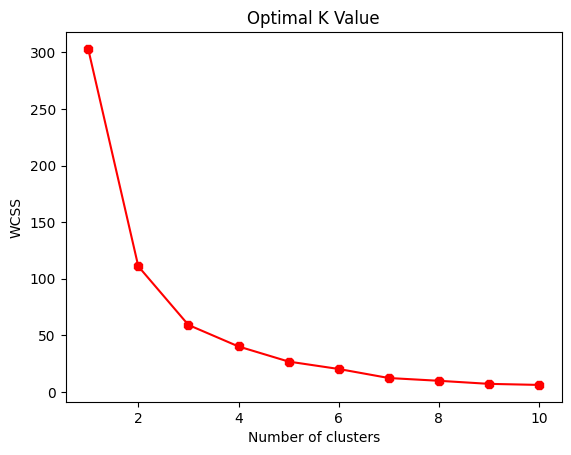

In [44]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red", marker ="8")
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
model=KMeans(n_clusters=4, random_state=0)
y_means = model.fit_predict(dataset)
y_means

array([3, 3, 2, 2, 1, 0, 1, 3, 2, 2, 3, 3, 3, 2, 3, 2, 1, 0, 3, 3, 2, 2,
       2, 3, 2, 1, 2, 0, 1, 2, 2, 0, 2, 3, 0, 2, 1, 2, 3, 1, 1, 3, 2, 3,
       1, 1, 2, 3, 0, 2, 3, 1, 3, 2, 3, 2, 2, 3, 2, 1, 3, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 1, 1, 1, 3, 3, 3, 2,
       2, 3, 3, 2, 2, 3, 0, 0, 1, 3, 1, 3, 3, 3, 2, 2, 2, 0, 3, 3, 3, 3,
       1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 0, 3, 2, 3, 2, 3,
       1, 3, 1, 3, 0, 0, 0, 3, 1, 1, 2, 2, 0, 3, 3, 3, 2, 0, 3, 0, 2, 3,
       2, 0, 3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 0, 3, 3, 2, 3, 2, 3, 2, 0, 0,
       2, 1, 0, 3, 1, 0, 1, 2, 3, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2, 1, 3, 3,
       3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 0, 2, 2, 3, 0, 1, 3, 1, 3, 1, 3, 3,
       1, 0, 3, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3,
       0, 3, 0, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 0, 3, 2, 2, 2, 3, 3,
       0, 0, 1, 0, 3, 3, 3, 3, 0, 3, 3, 2, 0, 3, 1, 0, 1, 2, 0, 2, 0, 1,
       2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 3, 3, 0,

In [46]:
dataset['cluster_id']=y_means

In [47]:
dataset

,INCOME,SPEND,cluster_id
0,233,150,3
1,250,187,3
2,204,172,2
3,236,178,2
4,354,163,1
...,...,...,...
298,241,123,3
299,264,132,3
300,193,141,0
301,131,115,0


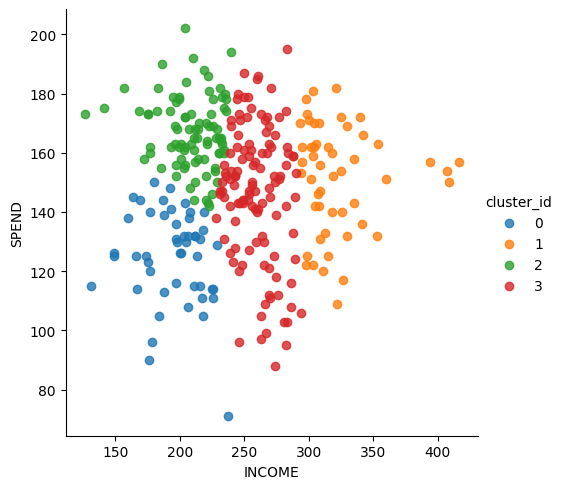

In [58]:
import seaborn as sns
sns.lmplot(x ='INCOME', y ='SPEND',fit_reg=False,hue="cluster_id", data = dataset)
plt.show()